In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#3.1 Problem - 1: Getting Started with Data Exploration
# 1.Data Exploration and Understanding
#Dataoverview
# Load the dataset and display the first 10 rows.
df = pd.read_csv('/content/drive/MyDrive/Assignment1/Dataset/WHR-2024-5CS037.csv')

print(df.head(10))

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

In [ ]:
#2.Identify the number of rows and columns in the dataset.
print("\nNumber of rows and columns:")
print(df.shape)


Number of rows and columns:
(143, 9)


In [ ]:
#3.List all the columns and their data types.
print("\nColumns and data types:")
df.dtypes


Columns and data types:


,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


In [ ]:
#Basic Statistics:
#1.Calculate the mean, median, and standard deviation for the Score column.
mean_score = df['score'].mean()
median_score = df['score'].median()
std_dev_score = df['score'].std()

print(f"Mean Score: {mean_score}")
print(f"Median Score: {median_score}")
print(f"Standard Deviation of Score: {std_dev_score}")

Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation of Score: 1.1707165099442995


In [ ]:
#2.Identify the country with the highest and lowest happiness scores.
highest_score_country = df.loc[df['score'].idxmax()]
lowest_score_country = df.loc[df['score'].idxmin()]

print("\nCountry with the highest happiness score:")
print(highest_score_country[['Country name', 'score']])

print("\nCountry with the lowest happiness score:")
print(lowest_score_country[['Country name', 'score']])


Country with the highest happiness score:
Country name    Finland
score             7.741
Name: 0, dtype: object

Country with the lowest happiness score:
Country name    Afghanistan
score                 1.721
Name: 142, dtype: object


In [ ]:
#Missing Values:
#1. Check if there are any missing values in the dataset.
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)


Missing values per column:
 Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
#Filtering and Sorting:
#1.Filter the dataset to show only the countries with a Score greater than 7.5.
filtered_df = df[df['score'] > 7.5]
print("\nCountries with a Score greater than 7.5:")
print(filtered_df[['Country name', 'score']])




Countries with a Score greater than 7.5:
  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525


In [ ]:
#2.Sort the dataset by Log GDP per capita in descending order and display the top 10 rows.
sorted_top10_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False).head(10)
print("\nTop 10 countries with Score > 7.5 sorted by GDP per Capita:")
print(sorted_top10_df)


Top 10 countries with Score > 7.5 sorted by GDP per Capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [ ]:
#1.Adding New Columns:
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print("\nDataset with 'Happiness Category' column added:")
print(df)


Dataset with 'Happiness Category' column added:
         Country name  score  Log GDP per capita  Social support  \
0             Finland  7.741               1.844           1.572   
1             Denmark  7.583               1.908           1.520   
2             Iceland  7.525               1.881           1.617   
3              Sweden  7.344               1.878           1.501   
4              Israel  7.341               1.803           1.513   
..                ...    ...                 ...             ...   
138  Congo (Kinshasa)  3.295               0.534           0.665   
139      Sierra Leone  3.245               0.654           0.566   
140           Lesotho  3.186               0.771           0.851   
141           Lebanon  2.707               1.377           0.577   
142       Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.695                         0.859  

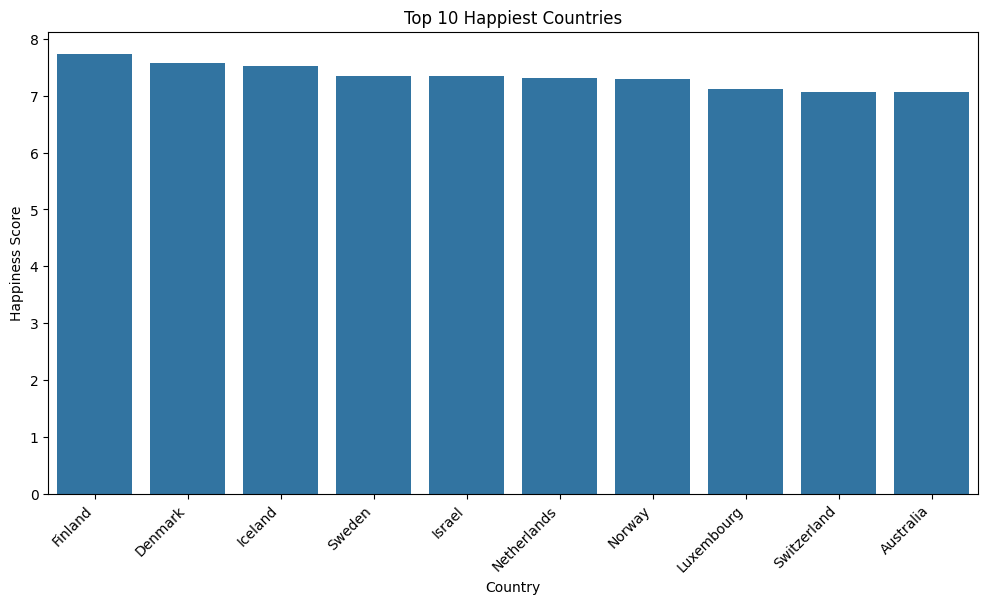

In [ ]:
#2. Data Visualizations:
#Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
top_10_happiest = df.sort_values('score', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Country name', y='score', data=top_10_happiest)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Happiest Countries')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.show()

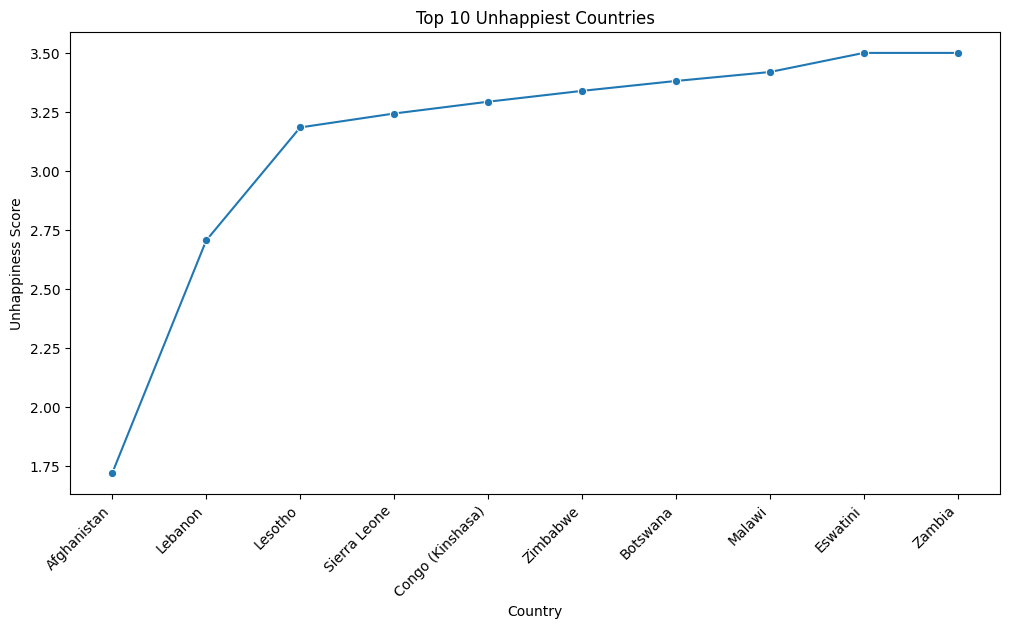

In [ ]:
#Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
top_10_unhappiest = df.sort_values('score', ascending=True).head(10)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Country name', y='score', data=top_10_unhappiest, marker='o')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Unhappiest Countries')
plt.xlabel('Country')
plt.ylabel('Unhappiness Score')
plt.show()

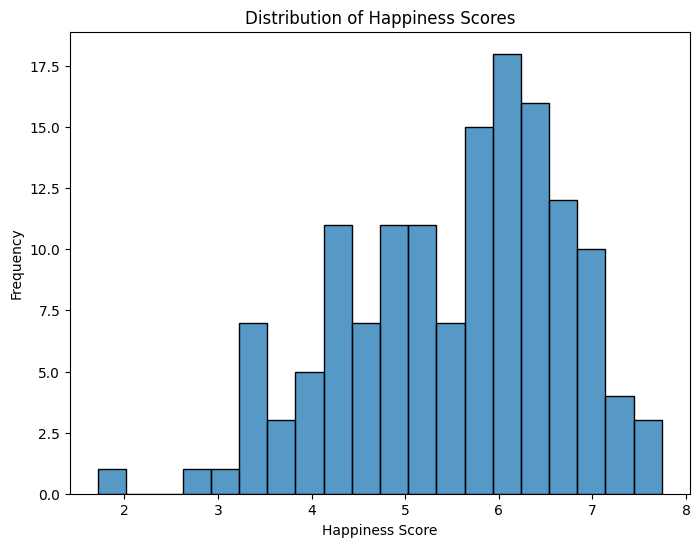

In [ ]:
#Plot a histogram for the Score column to show its distribution and also interpret.
plt.figure(figsize=(8, 6))
sns.histplot(df['score'], bins=20)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


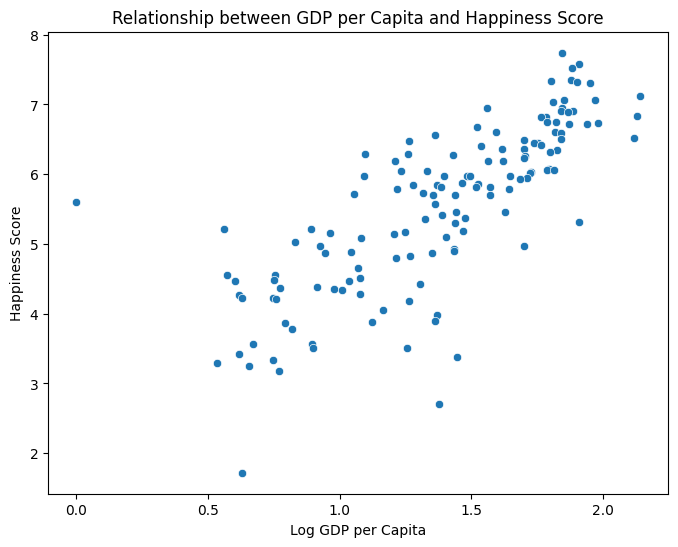

In [ ]:
#Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df)
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

In [ ]:
#3.2 Problem - 2 - Some Advance Data Exploration Task:
#Task-1.Preparing the South-Asia Dataset:
#Define the countries in South Asia with a list for example:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

south_asia_df.to_csv('south_asia_happiness.csv', index=False)
print(south_asia_df)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

In [34]:
#Task-2.Composite Score Ranking:
#1
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)
print(south_asia_df)

                Country name  score  Log GDP per capita  Social support  \
92                     Nepal  5.158               0.965           0.990   
107                 Pakistan  4.657               1.069           0.600   
125                    India  4.054               1.166           0.653   
127                Sri Lanka  3.898               1.361           1.179   
128               Bangladesh  3.886               1.122           0.249   
142              Afghanistan  1.721               0.628           0.000   
Composite Score          NaN    NaN                 NaN             NaN   

                 Healthy life expectancy  Freedom to make life choices  \
92                                 0.443                         0.653   
107                                0.321                         0.542   
125                                0.417                         0.767   
127                                0.586                         0.583   
128                          

In [35]:
# Rank countries based on Composite Score
#2
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)
south_asia_df = south_asia_df.reset_index(drop=True)
print(south_asia_df)

  Country name  score  Log GDP per capita  Social support  \
0    Sri Lanka  3.898               1.361           1.179   
1        Nepal  5.158               0.965           0.990   
2        India  4.054               1.166           0.653   
3     Pakistan  4.657               1.069           0.600   
4   Bangladesh  3.886               1.122           0.249   
5  Afghanistan  1.721               0.628           0.000   
6          NaN    NaN                 NaN             NaN   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.586                         0.583       0.144   
1                    0.443                         0.653       0.209   
2                    0.417                         0.767       0.174   
3                    0.321                         0.542       0.144   
4                    0.513                         0.775       0.140   
5                    0.242                         0.000       0.091   
6      

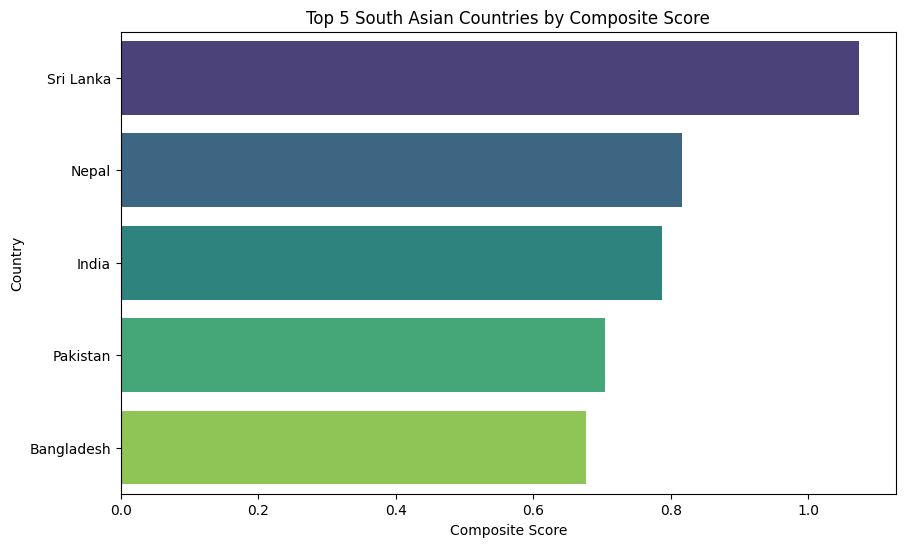

In [36]:
# Visualize top 5 countries
#3
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=south_asia_df.head(5), palette="viridis", hue='Country name', legend=False)
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

4.Discuss whether the rankings based on the Composite Score align with the original Score

The graph compares the Original Score and the Composite Score for South Asian countries.The Original Score (blue line) shows significant variation across countries, with peaks for Nepal, Sri Lanka, and Pakistan, and a sharp decline for Bangladesh and Afghanistan.The Composite Score (orange line) remains much lower and relatively flat across all countries, showing little variation.This shows a clear inconsistency indicating that the elements impacting the Original Score are not properly represented by the Composite Score method.Here is the visualization plot whether the rankings based on the Composite Score align with the original Score.


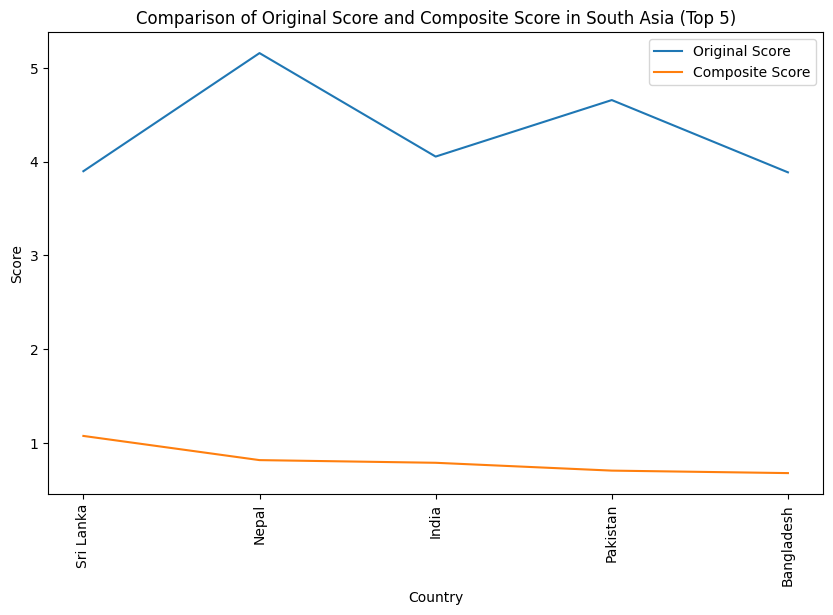

In [37]:
# Compare rankings with original Score - Top 5 countries
#4
plt.figure(figsize=(10, 6))

# Select top 5 countries for plotting
top5_countries = south_asia_df['Country name'].head(5)
filtered_df = south_asia_df[south_asia_df['Country name'].isin(top5_countries)]

plt.plot(filtered_df['score'], label='Original Score')
plt.plot(filtered_df['Composite Score'], label='Composite Score')

plt.xticks(range(len(filtered_df)), filtered_df['Country name'], rotation=90)

plt.title('Comparison of Original Score and Composite Score in South Asia (Top 5)')
plt.xlabel('Country')
plt.ylabel('Score')
plt.legend()
plt.show()

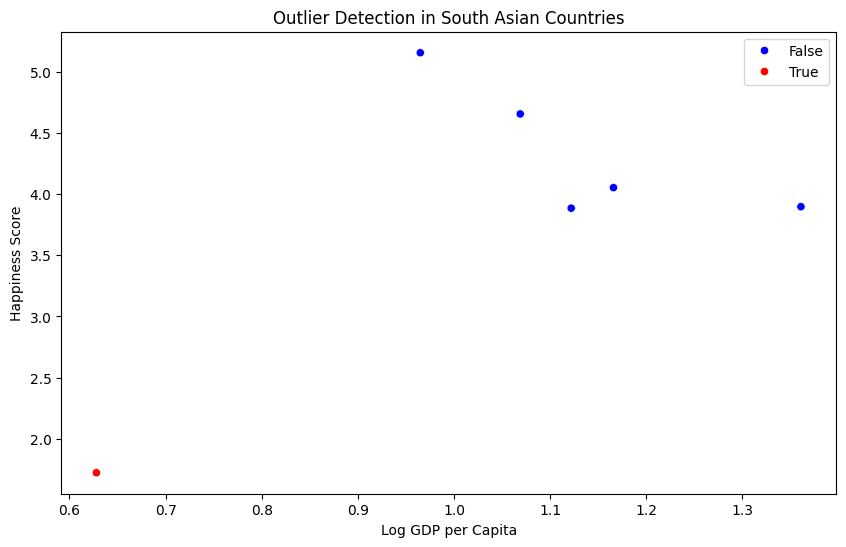

Outlier Countries:
  Country name  Log GDP per capita  score
5  Afghanistan               0.628  1.721


In [ ]:
#Task-3. Outlier Detection:

Q1_gdp = south_asia_df['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asia_df['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

Q1_score = south_asia_df['score'].quantile(0.25)
Q3_score = south_asia_df['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

outliers = south_asia_df[
    (south_asia_df['Log GDP per capita'] < lower_bound_gdp) |
    (south_asia_df['Log GDP per capita'] > upper_bound_gdp) |
    (south_asia_df['score'] < lower_bound_score) |
    (south_asia_df['score'] > upper_bound_score)
]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, hue=south_asia_df.index.isin(outliers.index), palette={True: 'red', False: 'blue'})
plt.title('Outlier Detection in South Asian Countries')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

print("Outlier Countries:")
print(outliers[['Country name', 'Log GDP per capita', 'score']])

4.Characteristics of outliers and their potential impact on regional averages.

Characteristics
-Countries with High GDP per capita often get benefit from stronger economic indicators but may not perform equally well in other social or health metrics are positive outliers.
-Whereas,Countries with low GDP per capita and low score reflecting both economic and developmental challenges are negative outliers.

Impacts
-Positive outliers with higher GDP per capita and scores provide the impression that the entire region is more developed or rich than it actually is.
-Negative outliers lower the average, drawing attention to large regional differences and hiding the improvements of nations with average performance.


In [ ]:
#Task-4.Exploring Trends Across Metrics:
#1
metrics = ['Freedom to make life choices', 'Generosity']
for metric in metrics:
    correlation = south_asia_df['score'].corr(south_asia_df[metric], method='pearson')
    print(f"Pearson correlation between Score and {metric}: {correlation}")


Pearson correlation between Score and Freedom to make life choices: 0.8005185224163315
Pearson correlation between Score and Generosity: 0.874512371253192


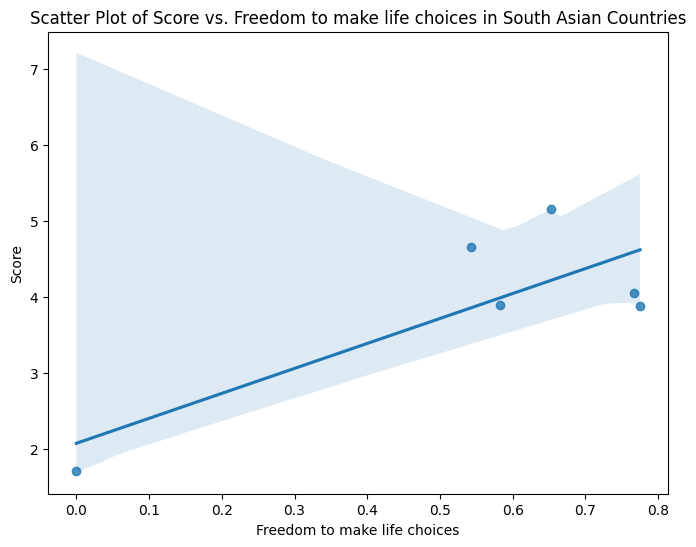

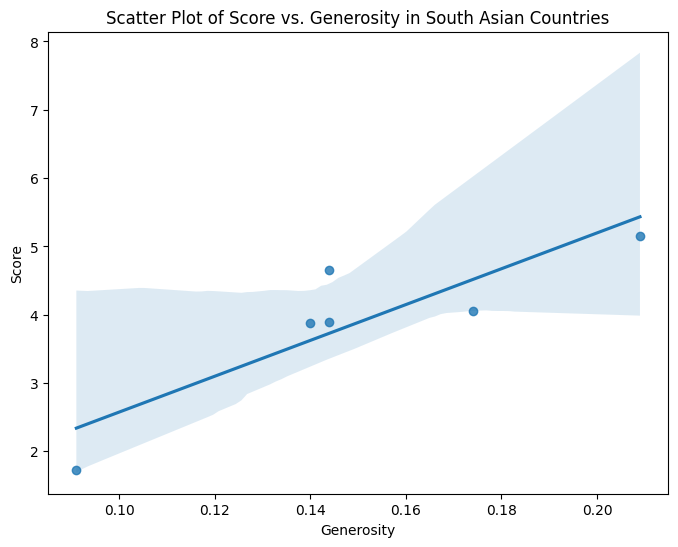

In [ ]:
#2. Create scatter plots with trendlines
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=metric, y='score', data=south_asia_df)
    plt.title(f'Scatter Plot of Score vs. {metric} in South Asian Countries')
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.show()

In [ ]:
#3. Discuss strongest and weakest relationships
strongest_metric = max(correlations, key=correlations.get)
weakest_metric = min(correlations, key=correlations.get)

print(f"\nStrongest relationship is with: {strongest_metric} ({correlations[strongest_metric]:.2f})")
print(f"Weakest relationship is with: {weakest_metric} ({correlations[weakest_metric]:.2f})")


Strongest relationship is with: Generosity (0.87)
Weakest relationship is with: Freedom to make life choices (0.80)


3.Discuss strongest and weakest relationships

Strongest relationship

Freedom to Make Life Choices and Score have the strongest correlation, with higher scores often being attained by nations with more personal freedom. This measure has a big impact on happiness and well-being.

Weakest relationship

Generosity has the smallest correlation and has less of an effect on the Score. Although it has a less direct impact and can change depending on cultural and economic variables, generosity does contribute to the well-being of society.



In [ ]:
#Task-5. Gap Analysis:
#1. Add GDP-Score Gap column
south_asia_df.loc['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']
print(south_asia_df)

              Country name  score  Log GDP per capita  Social support  \
0                Sri Lanka  3.898               1.361           1.179   
1                    Nepal  5.158               0.965           0.990   
2                    India  4.054               1.166           0.653   
3                 Pakistan  4.657               1.069           0.600   
4               Bangladesh  3.886               1.122           0.249   
5              Afghanistan  1.721               0.628           0.000   
GDP-Score Gap          NaN    NaN                 NaN             NaN   

               Healthy life expectancy  Freedom to make life choices  \
0                                0.586                         0.583   
1                                0.443                         0.653   
2                                0.417                         0.767   
3                                0.321                         0.542   
4                                0.513                 

In [ ]:
#2. Rank by GDP-Score Gap
south_asia_df_ascending = south_asia_df.sort_values(by='GDP-Score Gap')
south_asia_df_descending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)
print(south_asia_df_ascending)
print(south_asia_df_descending)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
127    Sri Lanka  3.898               1.361           1.179   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
127                    0.586                         0.583       0.144   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

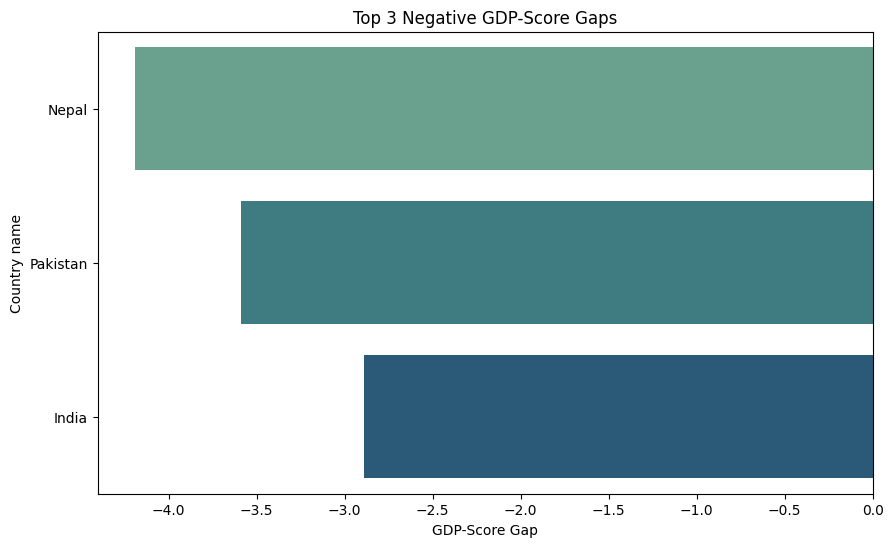

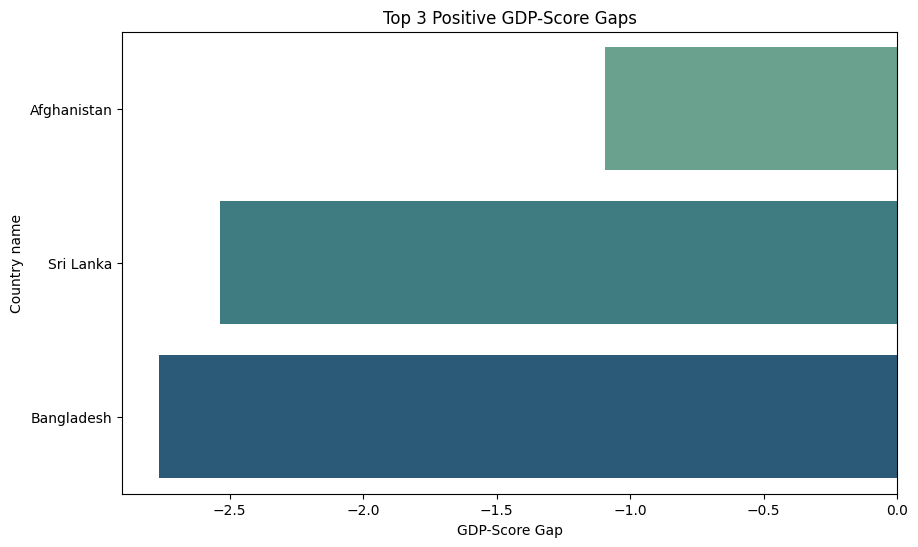

In [ ]:
#3. Bar charts for top 3 positive and negative gaps
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=south_asia_df_ascending.head(3), palette='crest', hue='Country name', dodge=False, legend=False)
plt.title("Top 3 Negative GDP-Score Gaps")
plt.xlabel("GDP-Score Gap")
plt.ylabel("Country name")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=south_asia_df_descending.head(3), palette='crest', hue='Country name', dodge=False, legend=False)
plt.title("Top 3 Positive GDP-Score Gaps")
plt.xlabel("GDP-Score Gap")
plt.ylabel("Country name")
plt.show()

# Save the final dataset
south_asia_df.to_csv("South_Asia_Final.csv", index=False)

4.Analyze reasons behind the gaps

Countries with large positive gaps might have high GDP but lower social support, health, or freedom.Positive Gaps highlight areas where economic development has not translated into proportional gains in overall well-being.

Countries with large negative gaps might have lower GDP but higher social support, health or freedom, which could improve happiness score.Negative Gaps emphasize that economic indicators alone do not determine happiness or satisfaction.


In [ ]:
#3.3 Task1-Preparing the Middle Eastern Dataset:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]

middle_east_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [ ]:
#3.3 Comparative Analysis:
#1. Descriptive Statistics:
# Create a list of Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Filter the DataFrame to include only Middle Eastern countries
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

# Calculate the mean and standard deviation of the score for the Middle East
mean_score_middle_east = middle_east_df['score'].mean()
std_dev_score_middle_east = middle_east_df['score'].std()

mean_score_south_asia = south_asia_df['score'].mean()
std_dev_score_south_asia = south_asia_df['score'].std()

print(f"Mean Happiness Score (Middle East): {mean_score_middle_east}")
print(f"Standard Deviation of Happiness Score (Middle East): {std_dev_score_middle_east}")
print(f"Mean Happiness Score (South Asia): {mean_score_south_asia}")
print(f"Standard Deviation of Happiness Score (South Asia): {std_dev_score_south_asia}")

if mean_score_middle_east > mean_score_south_asia:
    print("The Middle East has higher average happiness scores.")
elif mean_score_middle_east < mean_score_south_asia:
    print("South Asia has higher average happiness scores.")
else:
    print("Both regions have the same average happiness score.")

Mean Happiness Score (Middle East): 5.412100000000001
Standard Deviation of Happiness Score (Middle East): 1.5662011684327144
Mean Happiness Score (South Asia): 3.895666666666667
Standard Deviation of Happiness Score (South Asia): 1.1770690152521504
The Middle East has higher average happiness scores.


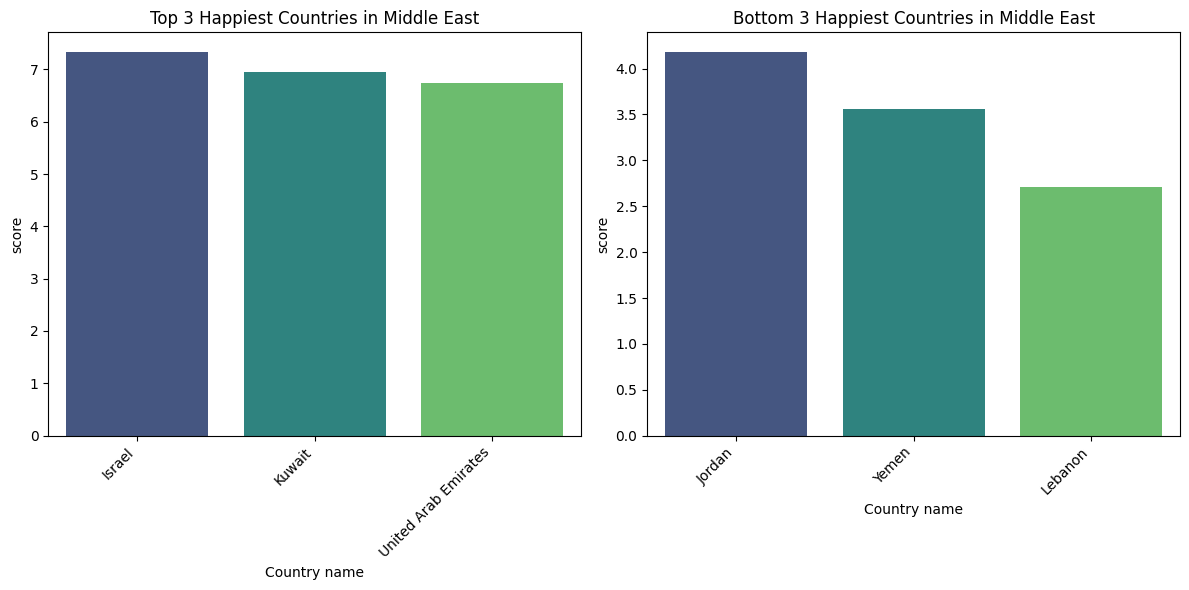

Top 3 Countries in Middle East:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733


Bottom 3 Countries in Middle East:
    Country name  score
124       Jordan  4.186
132        Yemen  3.561
141      Lebanon  2.707


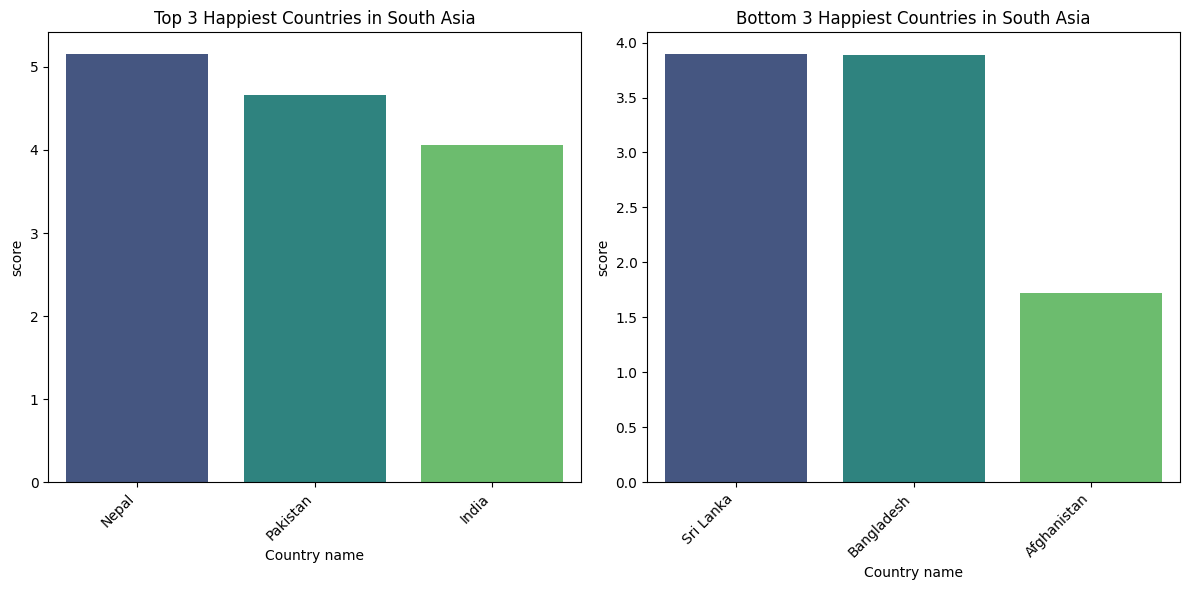

Top 3 Countries in South Asia:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054


Bottom 3 Countries in South Asia:
    Country name  score
127    Sri Lanka  3.898
128   Bangladesh  3.886
142  Afghanistan  1.721


In [ ]:
#2. Top and Bottom Performers:
def plot_top_bottom(df, region_name):

    region_df_sorted = df.sort_values(by='score', ascending=False)

    top3 = region_df_sorted.head(3)
    bottom3 = region_df_sorted.tail(3)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.barplot(x='Country name', y='score', data=top3, hue='Country name', palette="viridis", dodge=False)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top 3 Happiest Countries in {region_name}')

    plt.subplot(1, 2, 2)
    sns.barplot(x='Country name', y='score', data=bottom3, hue='Country name', palette="viridis", dodge=False)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Bottom 3 Happiest Countries in {region_name}')

    plt.tight_layout()
    plt.show()

    print(f"Top 3 Countries in {region_name}:")
    print(top3[['Country name', 'score']])
    print("\n")
    print(f"Bottom 3 Countries in {region_name}:")
    print(bottom3[['Country name', 'score']])

plot_top_bottom(middle_east_df, "Middle East")
plot_top_bottom(south_asia_df, "South Asia")

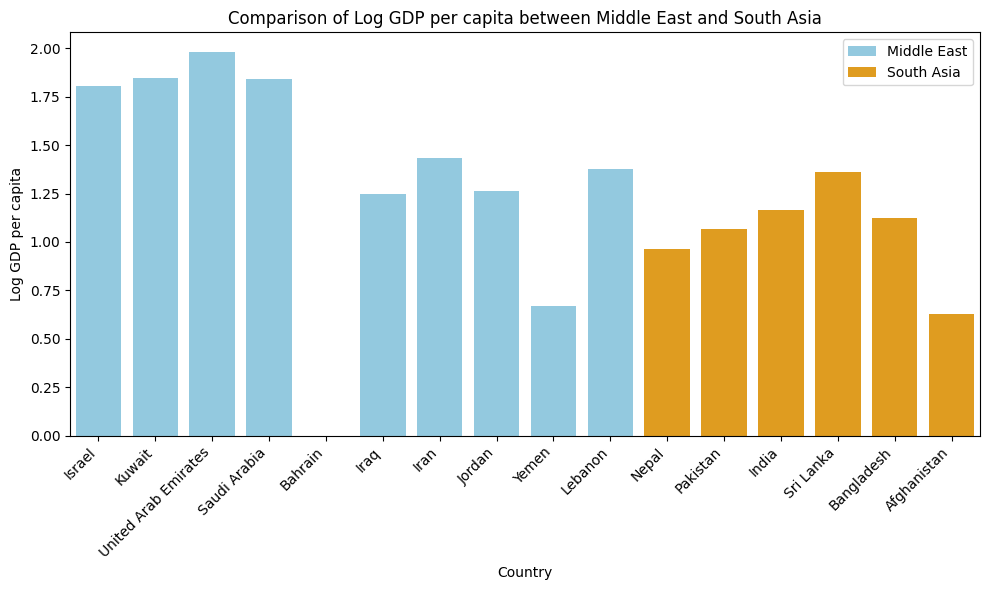

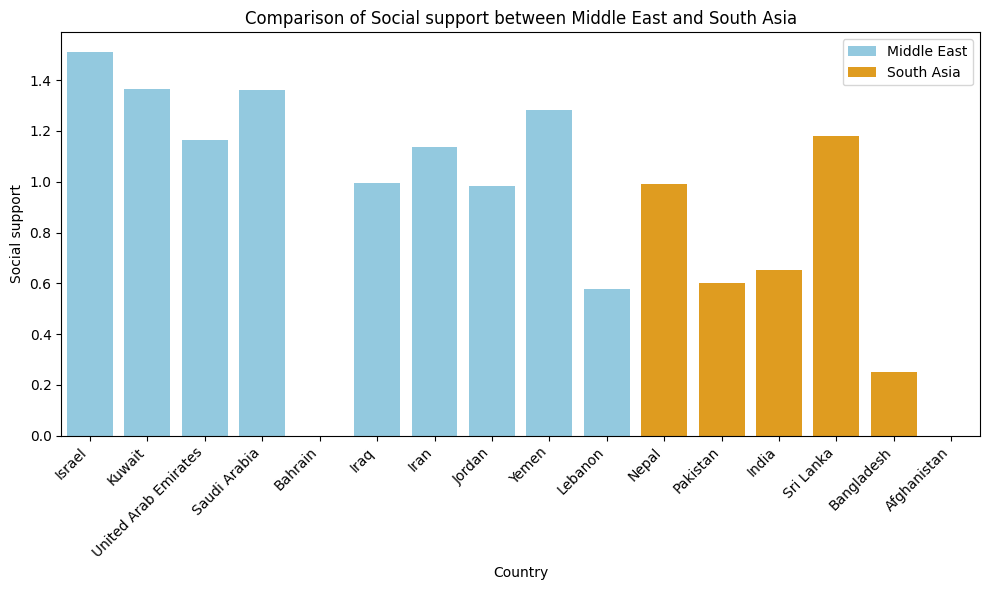

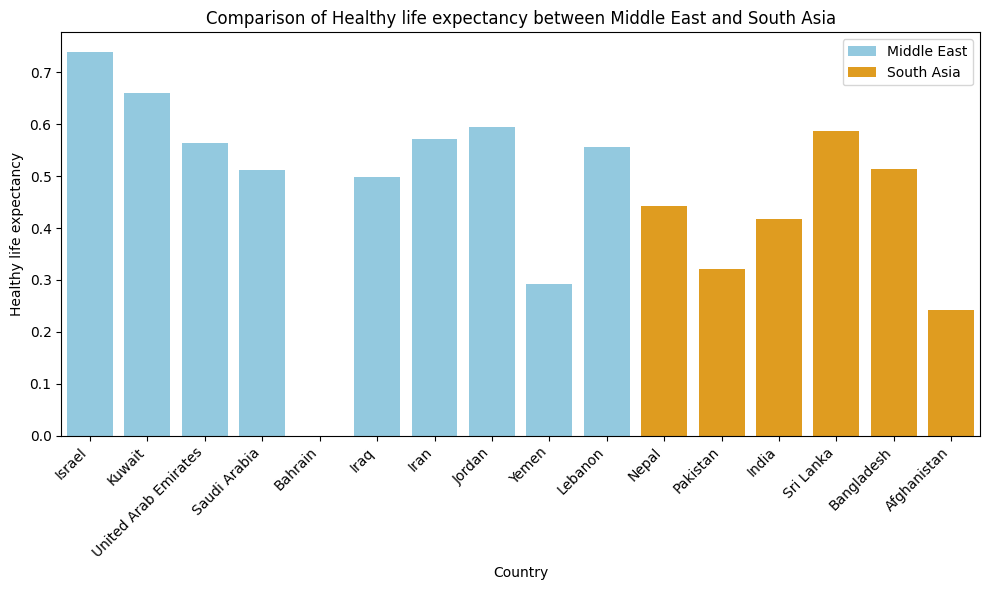

The metric with the largest disparity is: Social support


In [ ]:
#3. Metric Comparisons:
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

absolute_differences = []

for metric in metrics:
    middle_east_mean = middle_east_df[metric].mean()
    south_asia_mean = south_asia_df[metric].mean()

    absolute_differences.append(abs(middle_east_mean - south_asia_mean))

for metric in metrics:
    plt.figure(figsize=(10, 6))

    sns.barplot(x='Country name', y=metric, data=middle_east_df, color='skyblue', label='Middle East')
    sns.barplot(x='Country name', y=metric, data=south_asia_df, color='orange', label='South Asia')

    plt.xticks(rotation=45, ha='right')
    plt.title(f'Comparison of {metric} between Middle East and South Asia')
    plt.xlabel('Country')
    plt.ylabel(metric)
    plt.legend()
    plt.tight_layout()
    plt.show()

largest_disparity_metric = metrics[np.argmax(absolute_differences)]
print(f"The metric with the largest disparity is: {largest_disparity_metric}")

In [ ]:
#4. Happiness Disparity:

south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
south_asia_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()

middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

print("South Asia:")
print(f"  Range: {south_asia_range:.2f}")
print(f"  Coefficient of Variation: {south_asia_cv:.2f}")

print("\nMiddle East:")
print(f"  Range: {middle_east_range:.2f}")
print(f"  Coefficient of Variation: {middle_east_cv:.2f}")

if south_asia_cv > middle_east_cv:
    print("\nSouth Asia has greater variability in happiness.")
elif south_asia_cv < middle_east_cv:
    print("\nMiddle East has greater variability in happiness.")
else:
    print("\nBoth regions have the same variability in happiness.")

South Asia:
  Range: 3.44
  Coefficient of Variation: 0.30

Middle East:
  Range: 4.63
  Coefficient of Variation: 0.29

South Asia has greater variability in happiness.



Correlation Analysis for South Asia:
  Correlation between Score and Freedom to make life choices: 0.80


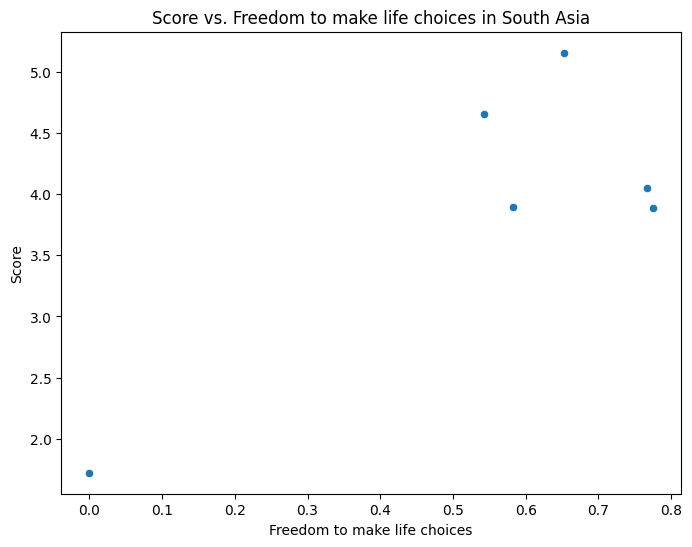

  Correlation between Score and Generosity: 0.87


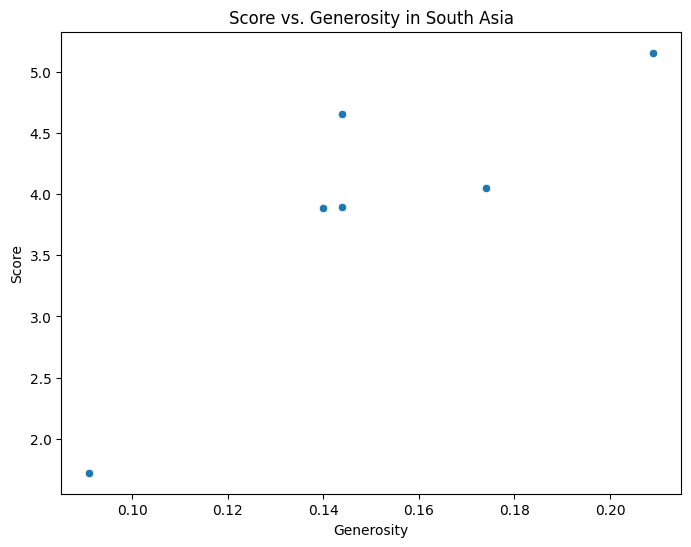


Correlation Analysis for Middle East:
  Correlation between Score and Freedom to make life choices: 0.86


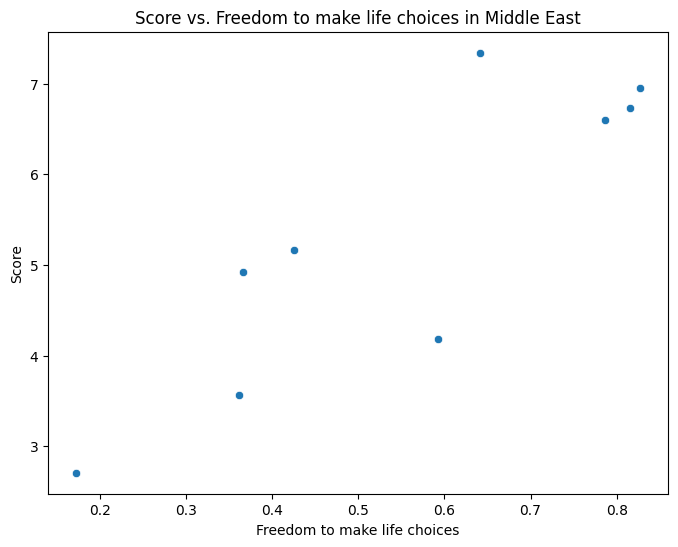

  Correlation between Score and Generosity: 0.63


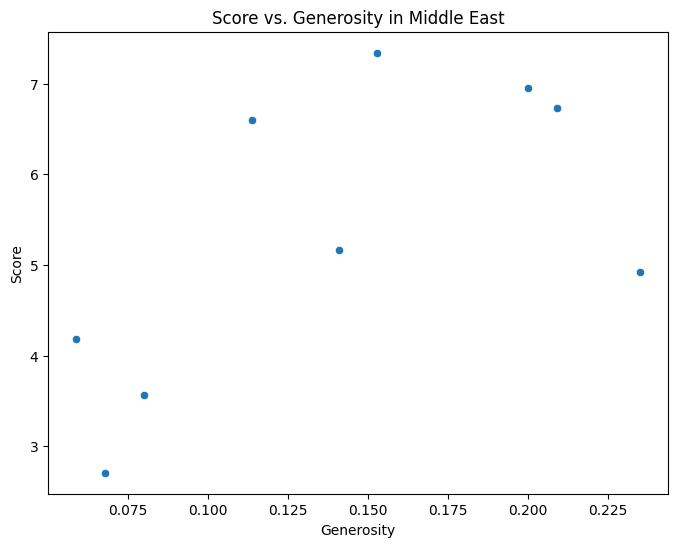

In [ ]:
# 5. Correlation Analysis:

metrics = ['Freedom to make life choices', 'Generosity']

def analyze_correlations(df, region_name):
    print(f"\nCorrelation Analysis for {region_name}:")
    for metric in metrics:
        correlation = df['score'].corr(df[metric])
        print(f"  Correlation between Score and {metric}: {correlation:.2f}")

        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=metric, y='score', data=df)
        plt.title(f'Score vs. {metric} in {region_name}')
        plt.xlabel(metric)
        plt.ylabel('Score')
        plt.show()

analyze_correlations(south_asia_df, "South Asia")
analyze_correlations(middle_east_df, "Middle East")

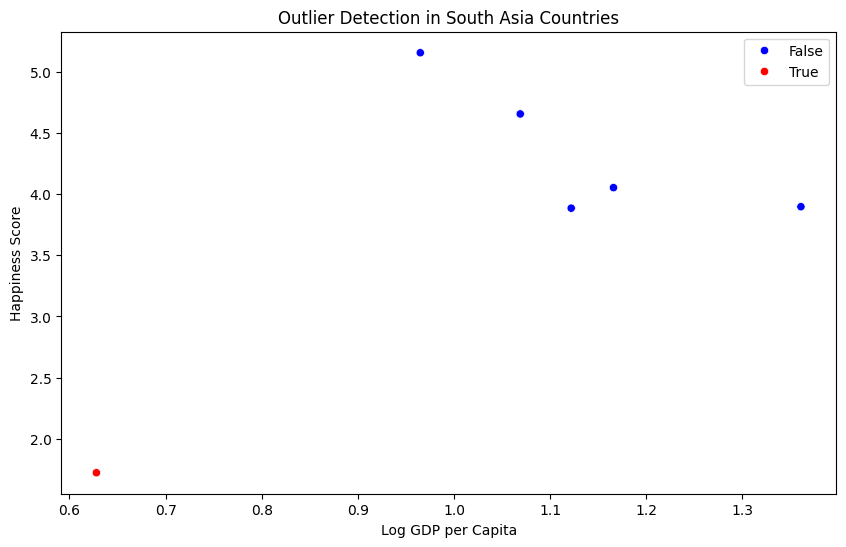

Outlier Countries in South Asia:
    Country name  Log GDP per capita  score
142  Afghanistan               0.628  1.721


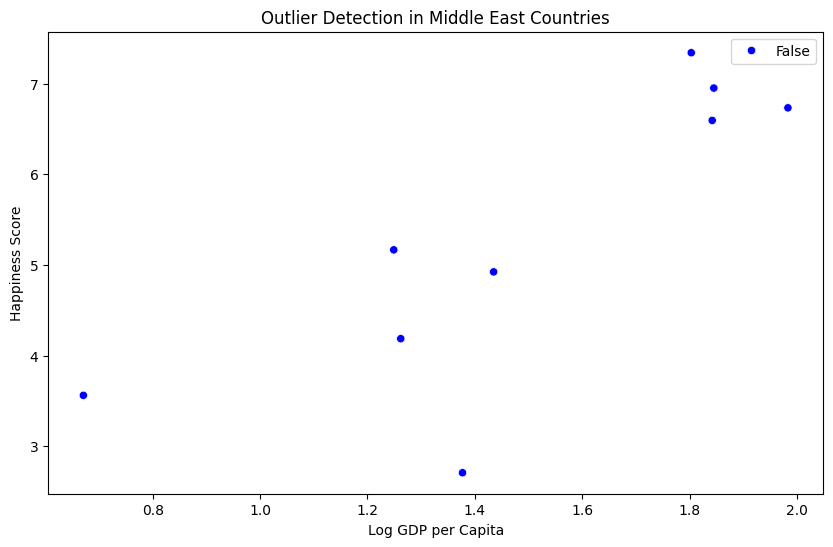

Outlier Countries in Middle East:
Empty DataFrame
Columns: [Country name, Log GDP per capita, score]
Index: []


In [ ]:
#6.Outlier Detection:
def detect_and_plot_outliers(df, region_name):

    Q1_gdp = df['Log GDP per capita'].quantile(0.25)
    Q3_gdp = df['Log GDP per capita'].quantile(0.75)
    IQR_gdp = Q3_gdp - Q1_gdp

    Q1_score = df['score'].quantile(0.25)
    Q3_score = df['score'].quantile(0.75)
    IQR_score = Q3_score - Q1_score

    lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
    upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

    lower_bound_score = Q1_score - 1.5 * IQR_score
    upper_bound_score = Q3_score + 1.5 * IQR_score

    outliers = df[
        (df['Log GDP per capita'] < lower_bound_gdp) |
        (df['Log GDP per capita'] > upper_bound_gdp) |
        (df['score'] < lower_bound_score) |
        (df['score'] > upper_bound_score)
    ]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Log GDP per capita', y='score', data=df, hue=df.index.isin(outliers.index), palette={True: 'red', False: 'blue'})
    plt.title(f'Outlier Detection in {region_name} Countries')
    plt.xlabel('Log GDP per Capita')
    plt.ylabel('Happiness Score')
    plt.show()

    print(f"Outlier Countries in {region_name}:")
    print(outliers[['Country name', 'Log GDP per capita', 'score']])

detect_and_plot_outliers(south_asia_df, "South Asia")
detect_and_plot_outliers(middle_east_df, "Middle East")

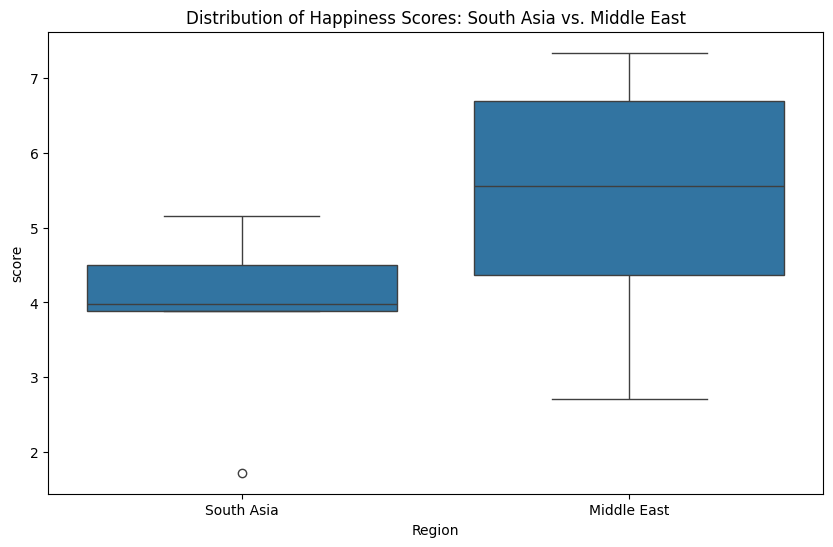

In [ ]:
#7. Visualization:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]


plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([south_asia_df.assign(Region='South Asia'),
                                                  middle_east_df.assign(Region='Middle East')]))
plt.title('Distribution of Happiness Scores: South Asia vs. Middle East')
plt.show()